## Final Project Submission

Please fill out:
* Student name: Natalia Quintero
* Student pace: full time
* Scheduled project review date/time: Friday March 22, 2019 
* Instructor name: Rafael Carrasco
* Blog post URL: https://naquech.github.io/ 

----------------
# Text Classification / NLP

Sentiment analysis focuses on analyzing and undertsanding emotions from subjective text patterns; it identifies opinions and attitudes towards certain topics and is usefuls in classifying viewpoints as positive or negative. 

The data set for this project is sourced from <a href='https://www.figure-eight.com/data-for-everyone/'> Figure Eight</a> platform and the name of the set is Sentiment Analysis on Global Warming/Climate Change. The set contains three classifications: Yes if the tweet suggests global warming existence, No if the tweet is in disagrement, and neutral if the tweet isnot engaged on either side. A column with the confidence score for the classification of each tweet is included in the set with a total of 6090 rows.

------------------
# Dataset




--------
# Data Acquisition

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('tweet_global_warming.csv', encoding="ISO-8859-1")
data.head(20)

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,Yes,1.0000
6,Global warming evidence all around us|A messag...,Yes,1.0000
7,Migratory Birds' New Climate Change Strategy: ...,Yes,1.0000
8,Southern Africa: Competing for Limpopo Water: ...,Yes,1.0000
9,"Global warming to impact wheat, rice productio...",Yes,1.0000


### Observations
We can see upper case words, some special characters (@, #, [link]) and punctuation; all of this needs to be removed before moving forward. The NaN values are clasified as neutral or ambiguous.

------------
# Feature Engineering

In [3]:
import matplotlib.pyplot as plt
import numpy as np


### Dataset Overview 

In [4]:
#shape
data.shape

(6090, 3)

In [5]:
#label column
data['existence'].value_counts()

Y      2554
N      1053
Yes     557
No       61
Name: existence, dtype: int64

We can see the column *(existence)* needs to be consolidated. When looking at the data file, the single letter classification starts around the 1100 row.

### Initial Cleaning

In [6]:
#column consolidation
data.loc[data['existence'] == 'Y', 'existence'] = 'Yes'
data.loc[data['existence'] == 'N', 'existence'] = 'No'

In [7]:
data['existence'].value_counts()

Yes    3111
No     1114
Name: existence, dtype: int64

In [8]:
#check for NaN -- this is what they have called neutral
data['existence'].isna().sum()

1865

In [9]:
data['existence'].replace(np.nan, 'Neutral', inplace=True)

In [10]:
data['existence'].value_counts()

Yes        3111
Neutral    1865
No         1114
Name: existence, dtype: int64

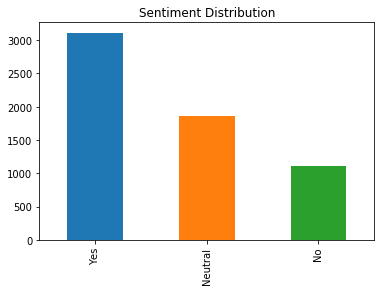

In [11]:
#Distribution of the data
data['existence'].value_counts().plot(kind='bar', title='Sentiment Distribution');

### Feature Engineering for Text Data

* Lowercase all text
* Remove stop words and punctuation
* Tokenize data
* Frequency distribution
* Remove suffixes throught techniques suc as stemming or lemmatization

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk import word_tokenize
import string, re

In [14]:
#print some tweets to look at what needs to be extracted

print(data['tweet'][5], '\n')
print(data['tweet'][10], '\n')
print(data['tweet'][25], '\n')
print(data['tweet'][50], '\n')
print(data['tweet'][500], '\n')
print(data['tweet'][1236], '\n')

RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness Shows Global Warming Is Intensifying Our Water Cycle [link] 

How do we solve this global warming thing? [link] 

effects of global warming ¥Ë_ YouTube ¥Ë_ Effects of Global Warming Stats: Back with more news for you today. It's ama... [link] 

Memo On The White House Correspondents Dinner: If You Want To Be Green, Report On Climate Change: I'd never be on... [link] 

Conservation International:: Give a gift that helps prevent climate change, provides habitat for endangered specie... [link] 

Many global issues require universal co-operation to address e.g. smallpox, ozone layer, climate change 



In [15]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [16]:
#remove @users
data['tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*") 
print(data['tweet'][5], '\n')

RT : RT : Ocean Saltiness Shows Global Warming Is Intensifying Our Water Cycle [link] 



In [17]:
#remove puntuaction
data['tweet'] = data['tweet'].str.replace("[^a-zA-Z#]", " ")
print(data['tweet'][5], '\n')

RT   RT   Ocean Saltiness Shows Global Warming Is Intensifying Our Water Cycle  link  



In [18]:
# remove stop words + short words
stopwords_list = stopwords.words('english')
stopwords_list += ['link']

In [19]:
def process_article(tweet):
    tokens = nltk.word_tokenize(tweet) 
    stopwords_removed = [token.lower() for token in tokens if token not in stopwords_list and len(token) > 4]
    return stopwords_removed

In [20]:
processed_data = list(map(process_article, data['tweet']))

In [21]:
print(processed_data[5], '\n')
print(processed_data[10], '\n')
print(processed_data[25], '\n')
print(processed_data[50], '\n')
print(processed_data[500], '\n')
print(processed_data[1236], '\n')

['ocean', 'saltiness', 'shows', 'global', 'warming', 'intensifying', 'water', 'cycle'] 

['solve', 'global', 'warming', 'thing'] 

['effects', 'global', 'warming', 'youtube', 'effects', 'global', 'warming', 'stats', 'today'] 

['white', 'house', 'correspondents', 'dinner', 'green', 'report', 'climate', 'change', 'never'] 

['conservation', 'international', 'helps', 'prevent', 'climate', 'change', 'provides', 'habitat', 'endangered', 'specie'] 

['global', 'issues', 'require', 'universal', 'operation', 'address', 'smallpox', 'ozone', 'layer', 'climate', 'change'] 



------------
# Summary

* hhfdaslfhaslf

-------------
# References


https://stackoverflow.com/questions/19699367/unicodedecodeerror-utf-8-codec-cant-decode-byte